# TMDrefined Preds for arithmetic mean with threshold = 2

In [1]:
#imports
import numpy as np
import pandas as pd
import os
import glob
import scripts.ML_TMDrefined as ml_ref
import scripts.Translate_TMDrefined as t_ref
import scripts.StandardConfig as stdc

In [2]:
# get all the files
path, sep = stdc.find_folderpath()
path_labels = f"{path}{sep}label_am2_data{sep}"
list_df_analysis_tags = glob.glob(f"{path_labels}*.xlsx")
list_df_analysis_tags

['/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_C.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_N.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_C.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_N.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_start_pos_TMD_thresh=2_CPP_top.xlsx',
 '/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_stop_pos_TMD_thresh=2_CPP_top.xlsx']

## N-term Pred with threshold 2 for arithmetic mean

In [3]:
test_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_test_N.xlsx').set_index("ID")
train_am_N2 = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am2_train_N.xlsx',).set_index("ID")
am_N2_top_CPP = pd.read_excel('/home/freiherr/PycharmProjects/TMDrefined/label_am2_data/am_label_single_start_pos_TMD_thresh=2_CPP_top.xlsx').set_index("Unnamed: 0")

In [4]:
am_N2_top_CPP.head(15)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions
Unnamed: 0,,,,,,,,,,,,,
0,"TMD-Segment(1,1)-LINS030107",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),% total accessible surfaces vs win3 of whole r...,0.161,0.074,-0.074,0.105,0.138,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
1,"TMD-Segment(1,1)-BLAS910101",Polarity,Hydrophobicity (surrounding),Side chain hydrophobicity,Scaled side chain hydrophobicity values (Black...,0.154,0.072,0.072,0.108,0.137,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
2,"TMD-Segment(1,1)-VINM940101",Structure-Activity,Flexibility,Flexibility,"Normalized flexibility parameters (B-values), ...",0.154,0.068,-0.068,0.110,0.128,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
3,"TMD-Segment(1,1)-MIYS990105",Composition,MPs (anchor),Partition energy,Optimized relative partition energies - method...,0.153,0.072,-0.072,0.117,0.139,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
4,"TMD-Segment(1,1)-GRAR740102",Polarity,Hydrophilicity,Polarity (hydrophilicity),"Polarity (Grantham, 1974)",0.153,0.069,-0.069,0.103,0.130,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
5,"TMD-Segment(1,1)-NISK800101",ASA/Volume,Buried,Interactivity,"8 A contact number (Nishikawa-Ooi, 1980)",0.153,0.066,0.066,0.107,0.128,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
6,"TMD-Segment(1,1)-WOLS870101",Others,PC 5,Principal Component 1 (Wold),"Principal property value z1 (Wold et al., 1987)",0.142,0.078,-0.078,0.141,0.158,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
7,"TMD-Segment(1,1)-MEIH800101",Shape,Reduced distance,Reduced distance (C-α),Average reduced distance for C-alpha (Meirovit...,0.141,0.076,-0.076,0.141,0.156,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."
8,"TMD-Segment(1,1)-BASU050102",Structure-Activity,Stability,Interactivity,Interactivity scale obtained by maximizing the...,0.135,0.087,0.087,0.170,0.183,0,0,"11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,2..."


In [5]:
train_am_N2.head(5)

,window_left,window_right,label,start_pos_TMD,norm_intersect_pos
ID,,,,,
INAR2_HUMAN__0,ESAK,IGGI,1,244,0.473786
INAR2_HUMAN__-1,AESA,KIGG,1,243,0.471845
INAR2_HUMAN__1,SAKI,GGII,0,245,0.475728
INAR2_HUMAN__-2,SAES,AKIG,0,242,0.469903
INAR2_HUMAN__2,AKIG,GIIT,0,246,0.477670


In [6]:
am_N2_top_CPP["category"].unique()

array(['ASA/Volume', 'Polarity', 'Structure-Activity', 'Composition',
       'Others', 'Shape', 'Conformation'], dtype=object)

In [7]:
aaontology_colors = {'ASA/Volume': [54,128,180], 
                     'Polarity': [253,220,34], 
                     'Structure-Activity': [140,94,86], 
                     'Composition': [255,146,50],
                     'Others': [127,127,127], 
                     'Shape': [55,192,206], 
                     'Conformation': [61,159,71],
                     'Energy': [213,65,65]
                    }

In [8]:
aaontology_colors_hex = {'ASA/Volume': "#3680b4", 
                         'Polarity': "#fddc22", 
                         'Structure-Activity': "#8c5e56", 
                         'Composition': "#ff9232",
                         'Others': "#7f7f7f", 
                         'Shape': "#37c0ce", 
                         'Conformation': "#3d9f47",
                         'Energy': "#d54141"
                        }

In [9]:
am_N2_CPP_list = [feature.split("-")[2] for feature in am_N2_top_CPP["feature"].to_numpy().tolist()]
am_N2_CPP_list

['LINS030107',
 'BLAS910101',
 'VINM940101',
 'MIYS990105',
 'GRAR740102',
 'NISK800101',
 'WOLS870101',
 'MEIH800101',
 'BASU050102',
 'BEGF750102',
 'ZIMJ680105',
 'MONM990201',
 'NAKH920108']

In [10]:
trainN2_scale_df, train_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=train_am_N2[["window_left", "window_right"]], label_df=train_am_N2["label"], scale_df_filter=am_N2_CPP_list, mode="norm")
trainN2_scale_df

Begin process:  08:02:56
End process:  08:03:09
Process time: 13.54 sec


,LINS030107,BLAS910101,VINM940101,MIYS990105,GRAR740102,NISK800101,WOLS870101,MEIH800101,BASU050102,BEGF750102,ZIMJ680105,MONM990201,NAKH920108
ID,,,,,,,,,,,,,
INAR2_HUMAN__0,0.44475,-0.39675,0.39175,0.47625,0.38600,-0.38475,0.36175,0.38900,-0.33050,-0.48850,-0.34225,0.15400,-0.35625
INAR2_HUMAN__-1,0.00025,-0.14850,0.02175,0.11900,0.09900,-0.08225,0.06800,0.03725,-0.08850,-0.11050,-0.02975,-0.21125,-0.02150
INAR2_HUMAN__1,0.22250,-0.17175,0.18075,0.28175,0.16675,-0.21825,0.14200,0.17600,-0.11650,-0.23850,-0.12500,0.00025,-0.16100
INAR2_HUMAN__-2,0.14475,-0.24150,0.15925,0.17050,0.16075,-0.18525,0.18625,0.19450,-0.21000,-0.30825,-0.14400,0.01950,-0.12800
INAR2_HUMAN__2,0.16675,-0.12350,0.20450,0.20250,0.17275,-0.14200,0.18800,0.18525,-0.17575,-0.28475,-0.20625,0.11525,-0.12925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
KLOTB_HUMAN__-1,0.48900,-0.48875,0.43675,0.53200,0.48425,-0.28975,0.58275,0.47225,-0.43650,-0.31400,-0.59350,0.36525,-0.43650
KLOTB_HUMAN__1,0.55550,-0.29175,0.47975,0.53175,0.34575,-0.38325,0.33875,0.48150,-0.41825,-0.55825,-0.30775,0.48075,-0.42400
KLOTB_HUMAN__-2,0.01675,-0.14450,-0.01000,0.03600,0.09850,0.02050,0.15050,0.03700,-0.01250,0.09875,-0.13425,-0.05775,-0.03225


In [11]:
train_N2_label_df

ID
INAR2_HUMAN__0     1
INAR2_HUMAN__-1    1
INAR2_HUMAN__1     0
INAR2_HUMAN__-2    0
INAR2_HUMAN__2     0
                  ..
KLOTB_HUMAN__-1    0
KLOTB_HUMAN__1     0
KLOTB_HUMAN__-2    0
KLOTB_HUMAN__2     0
KLOTB_HUMAN__3     0
Name: label, Length: 20115, dtype: int64

In [12]:
testN2_scale_df, test_N2_label_df = t_ref.aa_numeric_by_scale(feature_df=test_am_N2[["window_left", "window_right"]], label_df=test_am_N2["label"], scale_df_filter=am_N2_CPP_list, mode="norm")
testN2_scale_df

Begin process:  08:03:09
End process:  08:03:10
Process time: 0.271 sec


,LINS030107,BLAS910101,VINM940101,MIYS990105,GRAR740102,NISK800101,WOLS870101,MEIH800101,BASU050102,BEGF750102,ZIMJ680105,MONM990201,NAKH920108
ID,,,,,,,,,,,,,
TRML1_MOUSE__2,-0.00025,0.18000,-0.01500,-0.09150,-0.15725,0.03000,-0.26750,-0.13900,0.19475,0.09850,0.30775,0.01925,0.24275
SIM28_HUMAN__3,0.00025,-0.05150,-0.05175,-0.01975,0.01850,0.00350,0.12925,0.01850,0.00725,-0.10450,-0.20475,0.03850,-0.25675
LRRC4_MOUSE__3,0.13325,0.02650,0.12625,0.14250,0.04025,-0.07825,-0.16975,-0.05550,0.06475,0.13350,0.20800,0.07700,0.14675
PTPRM_HUMAN__1,0.22225,-0.09600,0.10625,0.15475,0.08650,-0.13475,0.04275,0.09250,0.00250,-0.02350,-0.03900,0.11550,-0.15675
TMIG3_MOUSE__1,0.28350,-0.39750,0.25475,0.27400,0.30550,-0.26450,0.45825,0.37050,-0.52225,-0.25575,-0.41750,0.34600,-0.51500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEM4C_HUMAN__-1,0.26650,-0.24550,0.26675,0.20250,0.26250,-0.23450,0.21375,0.18525,-0.17425,-0.27350,-0.16900,0.15375,-0.01375
CD34_HUMAN__-3,-0.04975,-0.01950,-0.01675,-0.01600,-0.00625,-0.03175,0.08650,0.07425,-0.07600,-0.16275,-0.02850,0.05800,-0.11625
RELL2_HUMAN__0,0.49475,-0.46900,0.39875,0.53150,0.50000,-0.39525,0.52150,0.41675,-0.64975,-0.41850,-0.42925,0.67275,-0.46775


In [13]:
test_N2_label_df

ID
TRML1_MOUSE__2     0
SIM28_HUMAN__3     0
LRRC4_MOUSE__3     0
PTPRM_HUMAN__1     0
TMIG3_MOUSE__1     0
                  ..
SEM4C_HUMAN__-1    0
CD34_HUMAN__-3     0
RELL2_HUMAN__0     1
PTPRV_MOUSE__0     1
MXRA8_HUMAN__-1    0
Name: label, Length: 300, dtype: int64

In [14]:
# now the BIG algorithm, get all the treeeeeez

Begin process:  08:03:10
Path /home/freiherr/PycharmProjects/TMDrefined/output_forest_model_[am_N2_(2)]_2024-03-24 has been created
given parameters: {'n_estimators': array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
       430, 440, 450, 460, 470, 480, 490, 500]), 'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30]), 'max_leaf_nodes': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35]), 'class_weight': ['balanced'], 'bootstrap': [True], 'n_jobs': [6], 'criterion': ['gini']} with HalvingGridSearchCV gave following best-performing parameter combi:best params: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 18, 'max_leaf_nodes': 34, 'n_estimators': 410, 'n_jobs': 6}
End process:  16:49:58
Process time: 31607.535 sec


/home/freiherr/PycharmProjects/TMDrefined/scripts/ML_TMDrefined.py:151: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scale_labels, rotation=45, ha="right", fontweight="bold")


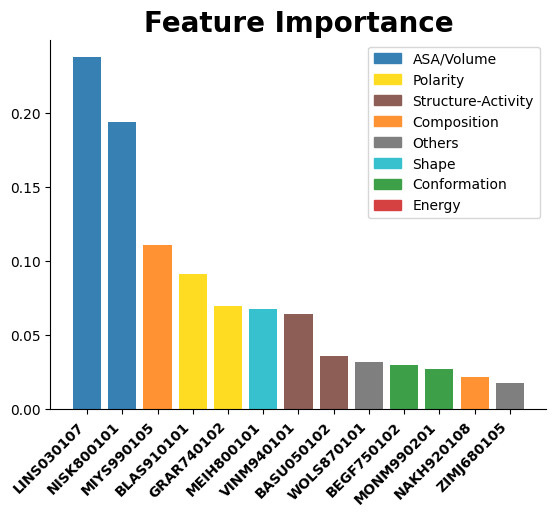

In [15]:
#best_params= {'bootstrap': [True], 'class_weight': ['balanced'], 'criterion': ['gini'], 'max_depth': [15], 'max_leaf_nodes': [20], 'n_estimators': [340], 'n_jobs': [6]}
AM_N2_forest = ml_ref.ForestTMDrefind.make_forest(trainN2_scale_df, train_N2_label_df, job_name="am_N2_(2)", n_jobs=6)
AM_N2_forest.fetch_a_tree()
AM_N2_forest.hyperparameter_summary(save_table=True)
AM_N2_forest.feature_importance()

In [16]:
test_labels_pred = AM_N2_forest.predict_labels(testN2_scale_df) 
test_labels_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

Accuracy: 0.68
Precision: 0.34532374100719426
Recall: 0.9056603773584906


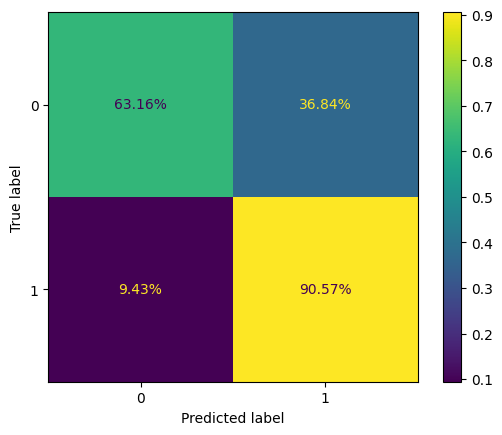

In [17]:
AM_N2_forest.test_predict_quality(label_test=test_N2_label_df, label_pred=test_labels_pred, cm_save=True)

In [18]:
# P05067, APP, 701
seq = "MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQMQN"

Begin process:  16:50:00
End process:  16:50:00
Process time: 0.137 sec


['APP', 702]

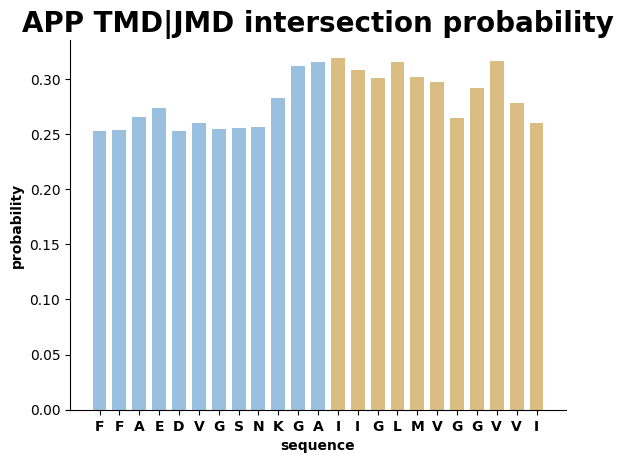

In [19]:
AM_N2_forest.pred_from_seq("APP", seq, 701)